Import Packages

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [23]:
parent_dir = '../../../data/philosopher/3/'

N = 1_000
M = 1_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [24]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:05:16 2025 +0200) (510.59ms ela...,0.1510,0.0000,0.291,0.32,0.04,3.06,69.00 C,Nominal
1,(Tue Apr 15 21:05:17 2025 +0200) (508.90ms ela...,1.3000,0.0312,0.396,1.50,0.23,19.87,69.00 C,Nominal
2,(Tue Apr 15 21:05:17 2025 +0200) (507.29ms ela...,0.0904,0.0000,0.257,0.15,0.05,2.54,68.73 C,Nominal
3,(Tue Apr 15 21:05:18 2025 +0200) (508.96ms ela...,0.0661,0.0000,0.264,0.12,0.03,2.59,68.73 C,Nominal
4,(Tue Apr 15 21:05:18 2025 +0200) (509.50ms ela...,0.0885,0.0000,0.280,0.15,0.05,2.88,68.40 C,Nominal


In [25]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(188, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:05:27 2025 +0200) (58.16ms elap...,39.6,0.0,1.26,40.57,3.99,99.76,65.86 C,Nominal
1,(Tue Apr 15 21:05:27 2025 +0200) (55.37ms elap...,40.3,0.0,1.09,40.93,4.00,99.93,65.86 C,Nominal
2,(Tue Apr 15 21:05:27 2025 +0200) (55.87ms elap...,36.4,0.0,1.46,37.63,4.00,99.89,65.86 C,Nominal
3,(Tue Apr 15 21:05:27 2025 +0200) (54.80ms elap...,38.3,0.0,1.60,39.58,4.00,100.08,65.86 C,Nominal
4,(Tue Apr 15 21:05:27 2025 +0200) (56.03ms elap...,38.4,0.0,1.78,39.61,3.92,98.77,65.86 C,Nominal


In [26]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:07:28 2025 +0200) (510.32ms ela...,0.217,0.0000,0.261,0.29,0.06,4.26,54.09 C,Nominal
1,(Tue Apr 15 21:07:28 2025 +0200) (508.05ms ela...,0.604,0.0339,0.376,0.74,0.14,11.00,54.09 C,Nominal
2,(Tue Apr 15 21:07:29 2025 +0200) (507.24ms ela...,0.689,0.0000,0.276,0.78,0.11,8.73,54.06 C,Nominal
3,(Tue Apr 15 21:07:29 2025 +0200) (508.15ms ela...,0.077,0.0000,0.266,0.13,0.04,3.23,54.06 C,Nominal
4,(Tue Apr 15 21:07:30 2025 +0200) (508.70ms ela...,0.239,0.0000,0.270,0.35,0.14,8.22,53.98 C,Nominal


In [27]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(611, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:07:39 2025 +0200) (57.73ms elap...,27.5,0.0,0.499,27.77,3.80,97.19,53.25 C,Nominal
1,(Tue Apr 15 21:07:39 2025 +0200) (54.75ms elap...,26.8,0.0,0.461,27.68,3.74,97.12,54.68 C,Nominal
2,(Tue Apr 15 21:07:39 2025 +0200) (55.67ms elap...,26.9,0.0,0.471,27.70,3.69,96.29,54.68 C,Nominal
3,(Tue Apr 15 21:07:39 2025 +0200) (54.79ms elap...,27.3,0.0,0.476,28.01,3.85,97.98,54.68 C,Nominal
4,(Tue Apr 15 21:07:39 2025 +0200) (55.12ms elap...,27.4,0.0,0.440,27.85,3.84,97.60,54.68 C,Nominal


Clean the Data

In [28]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [29]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [30]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:05:16,0.1510,0.0000,0.291,0.32,0.04,3.06,69.00,Nominal,510.59
1,2025-04-15 21:05:17,1.3000,0.0312,0.396,1.50,0.23,19.87,69.00,Nominal,508.90
2,2025-04-15 21:05:17,0.0904,0.0000,0.257,0.15,0.05,2.54,68.73,Nominal,507.29
3,2025-04-15 21:05:18,0.0661,0.0000,0.264,0.12,0.03,2.59,68.73,Nominal,508.96
4,2025-04-15 21:05:18,0.0885,0.0000,0.280,0.15,0.05,2.88,68.40,Nominal,509.50


In [31]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(188, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:05:27,39.6,0.0,1.26,40.57,3.99,99.76,65.86,Nominal,58.16
1,2025-04-15 21:05:27,40.3,0.0,1.09,40.93,4.00,99.93,65.86,Nominal,55.37
2,2025-04-15 21:05:27,36.4,0.0,1.46,37.63,4.00,99.89,65.86,Nominal,55.87
3,2025-04-15 21:05:27,38.3,0.0,1.60,39.58,4.00,100.08,65.86,Nominal,54.80
4,2025-04-15 21:05:27,38.4,0.0,1.78,39.61,3.92,98.77,65.86,Nominal,56.03


In [32]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:07:28,0.217,0.0000,0.261,0.29,0.06,4.26,54.09,Nominal,510.32
1,2025-04-15 21:07:28,0.604,0.0339,0.376,0.74,0.14,11.00,54.09,Nominal,508.05
2,2025-04-15 21:07:29,0.689,0.0000,0.276,0.78,0.11,8.73,54.06,Nominal,507.24
3,2025-04-15 21:07:29,0.077,0.0000,0.266,0.13,0.04,3.23,54.06,Nominal,508.15
4,2025-04-15 21:07:30,0.239,0.0000,0.270,0.35,0.14,8.22,53.98,Nominal,508.70


In [33]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(611, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:07:39,27.5,0.0,0.499,27.77,3.80,97.19,53.25,Nominal,57.73
1,2025-04-15 21:07:39,26.8,0.0,0.461,27.68,3.74,97.12,54.68,Nominal,54.75
2,2025-04-15 21:07:39,26.9,0.0,0.471,27.70,3.69,96.29,54.68,Nominal,55.67
3,2025-04-15 21:07:39,27.3,0.0,0.476,28.01,3.85,97.98,54.68,Nominal,54.79
4,2025-04-15 21:07:39,27.4,0.0,0.440,27.85,3.84,97.60,54.68,Nominal,55.12


Visualize the Data

In [34]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


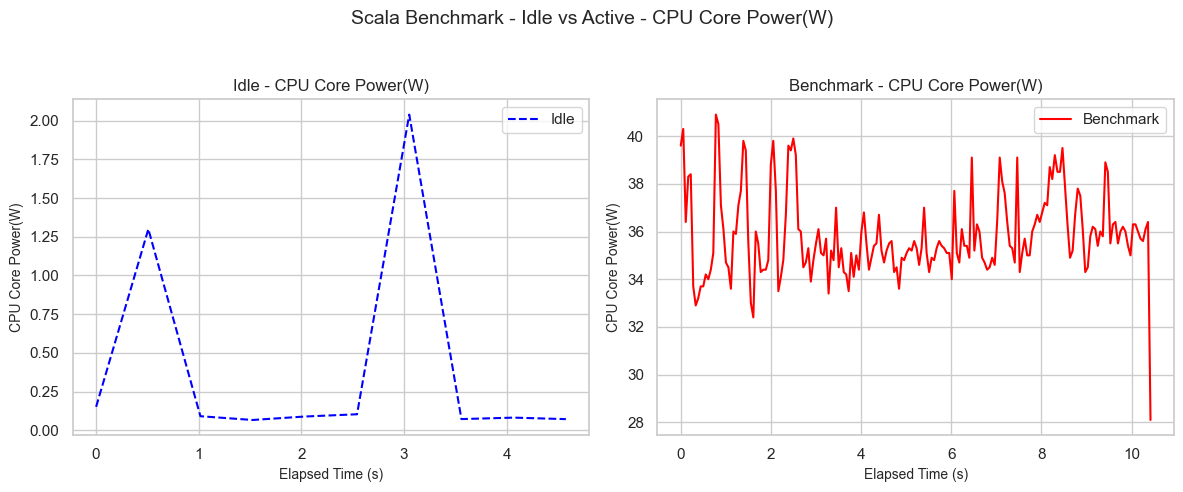

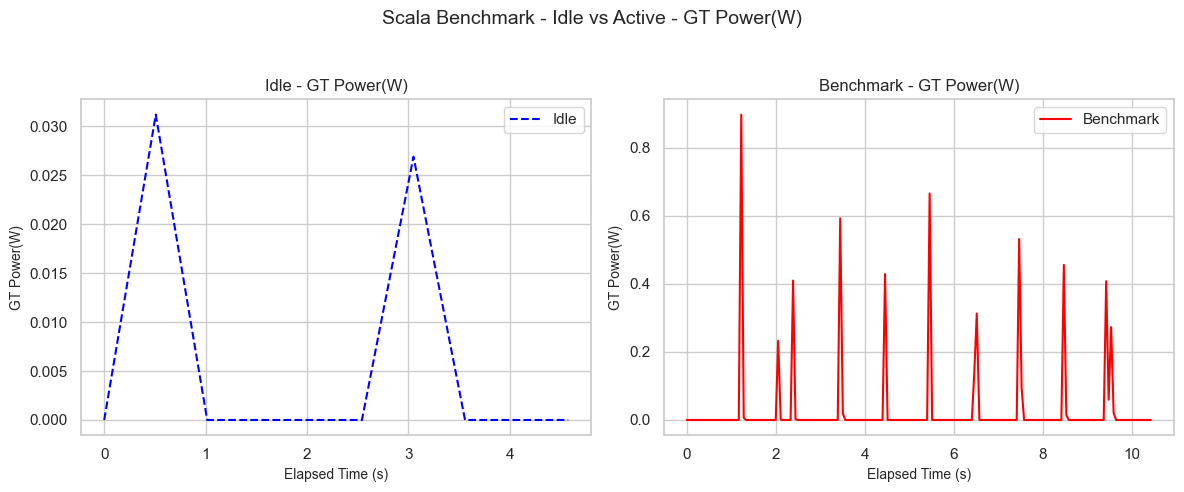

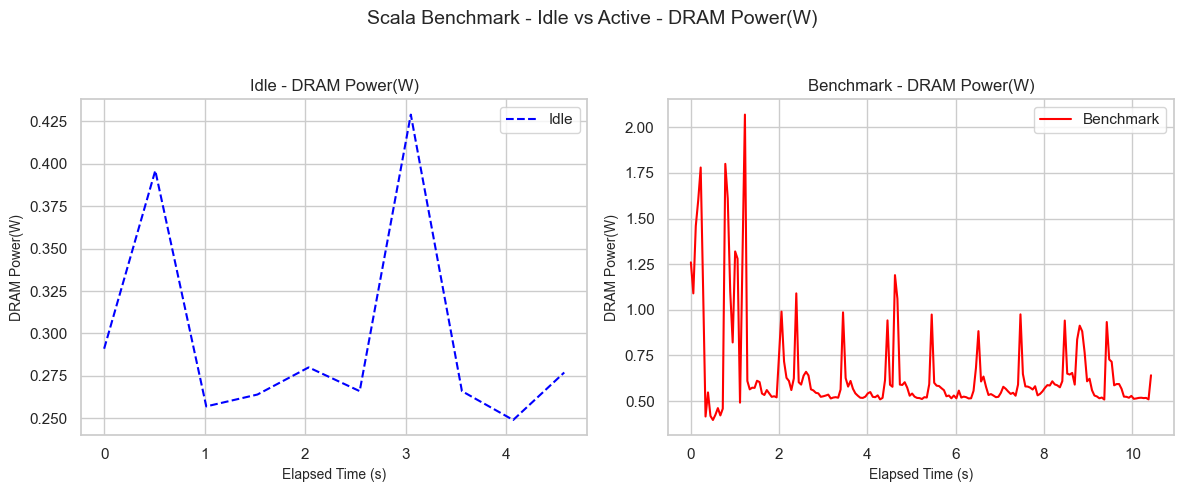

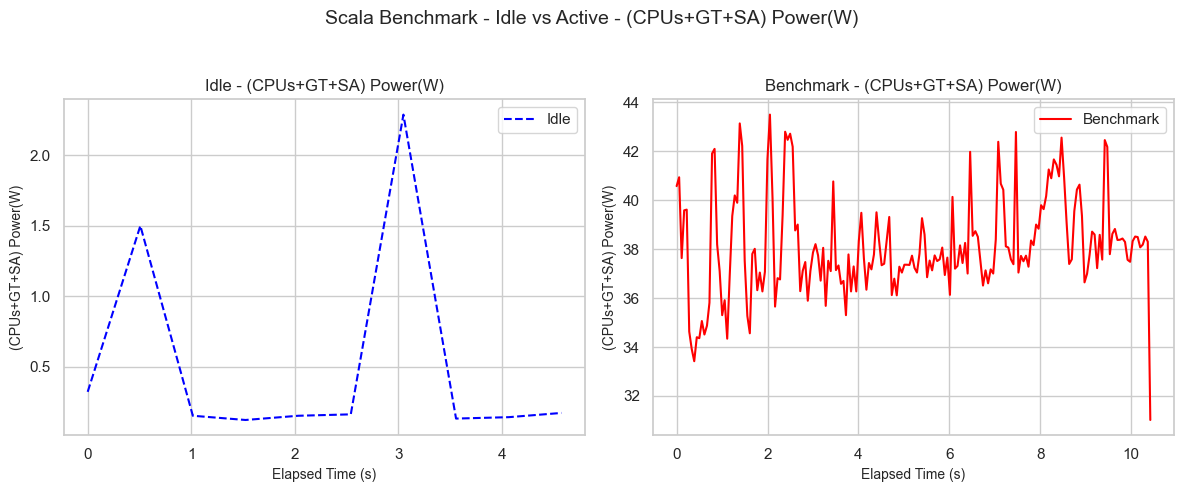

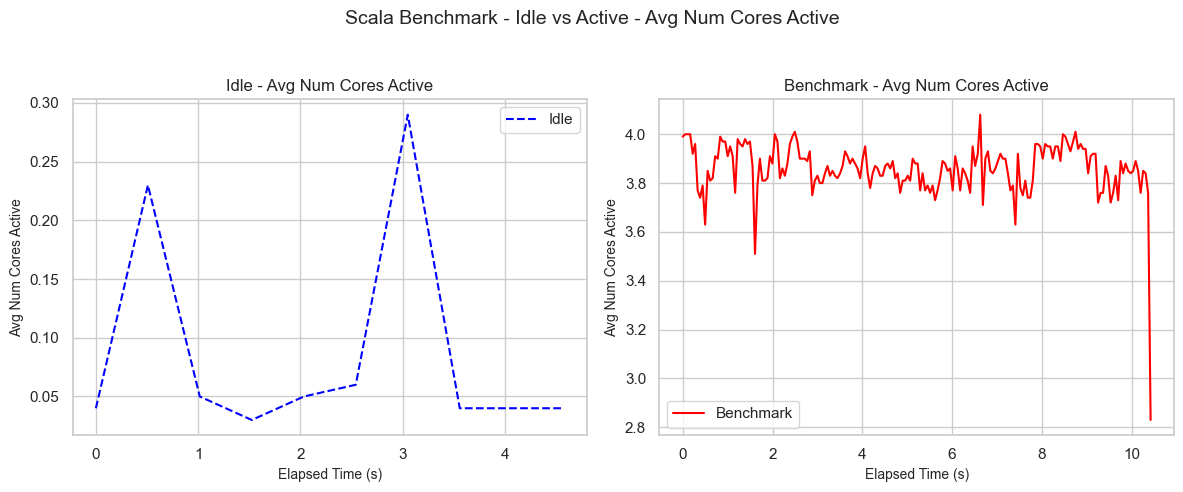

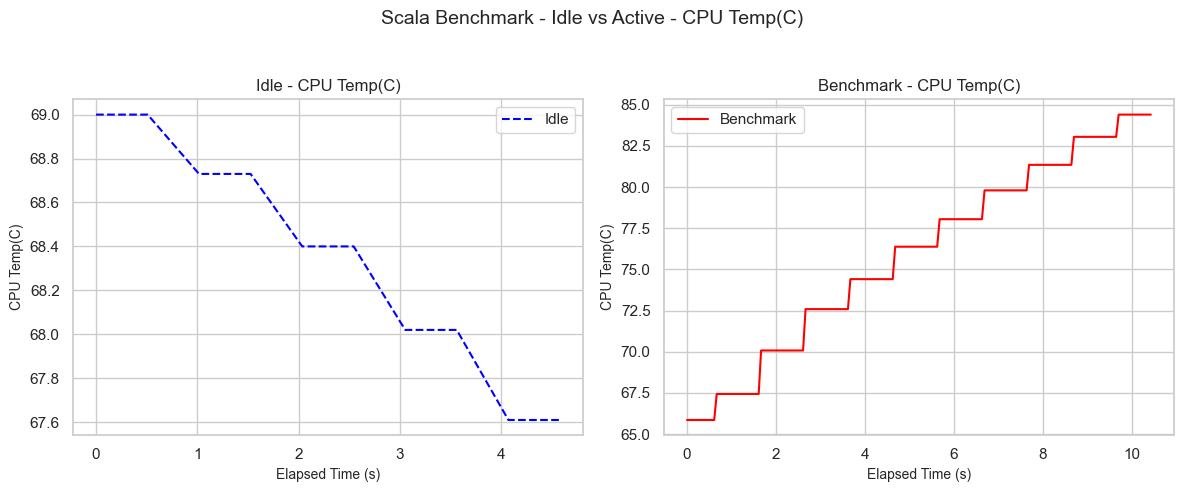

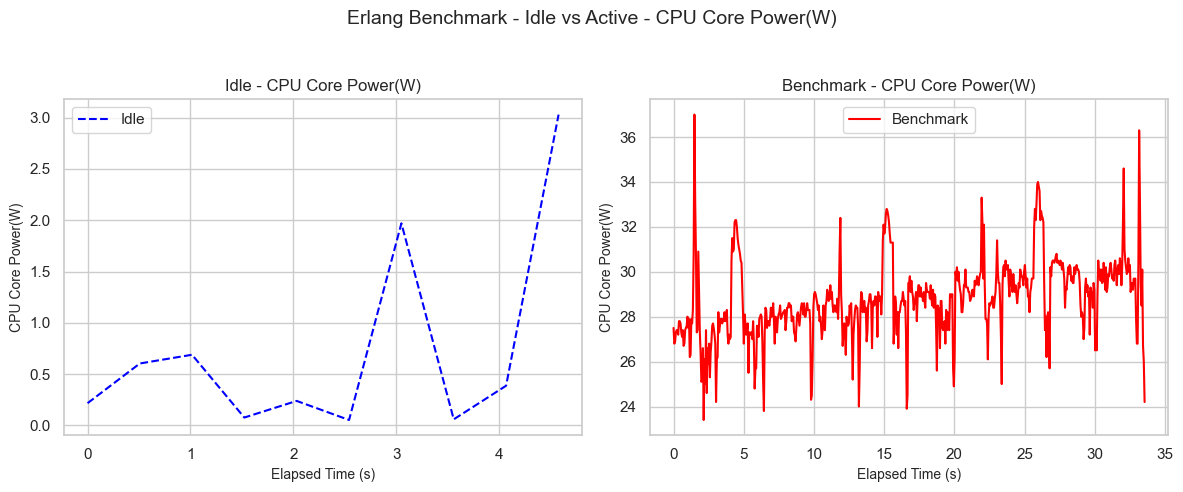

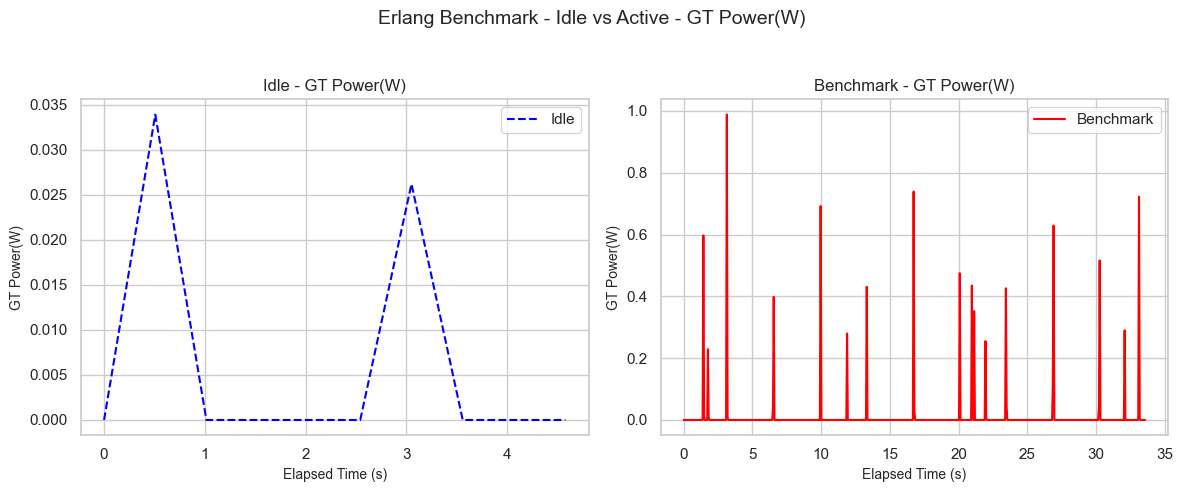

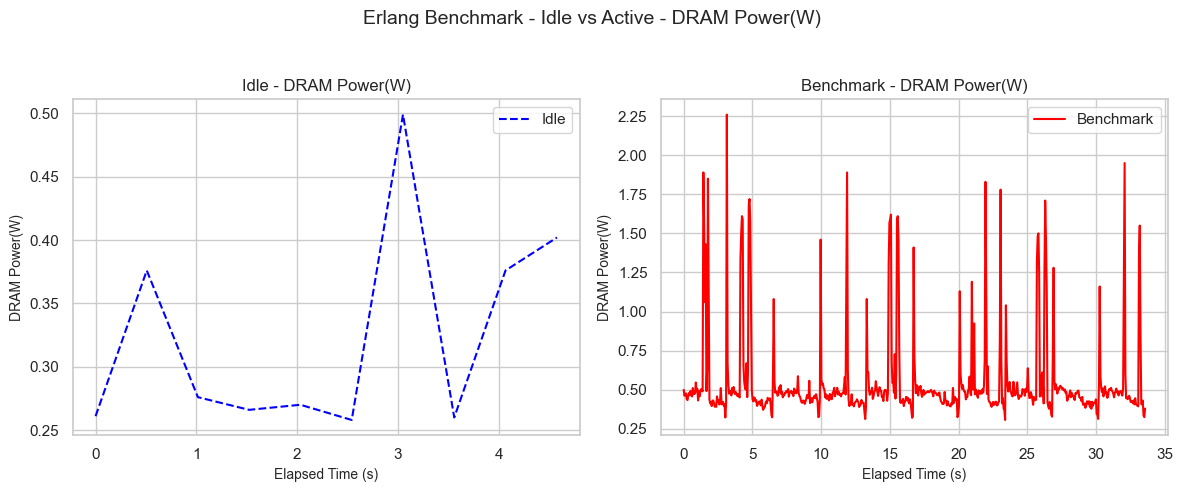

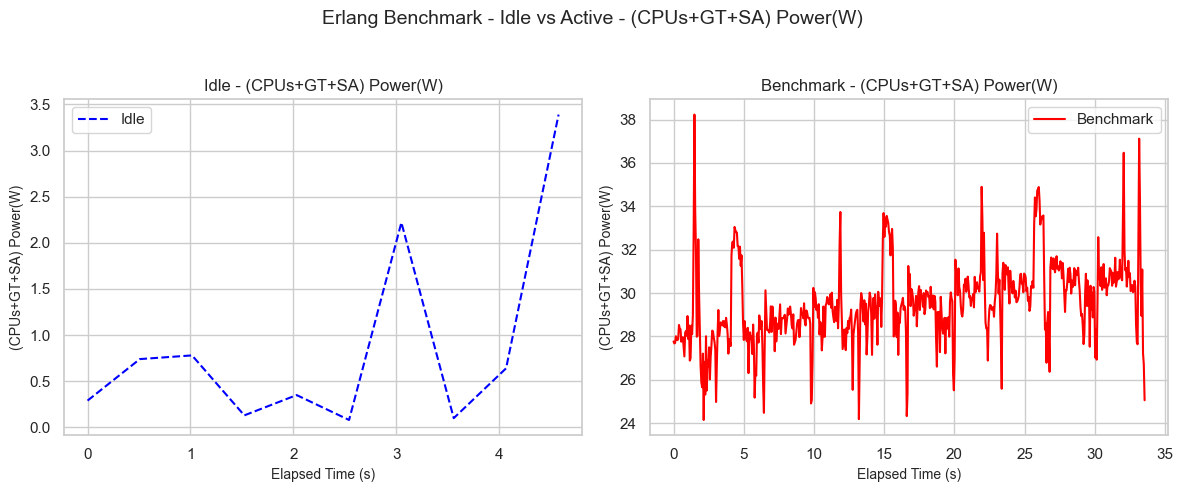

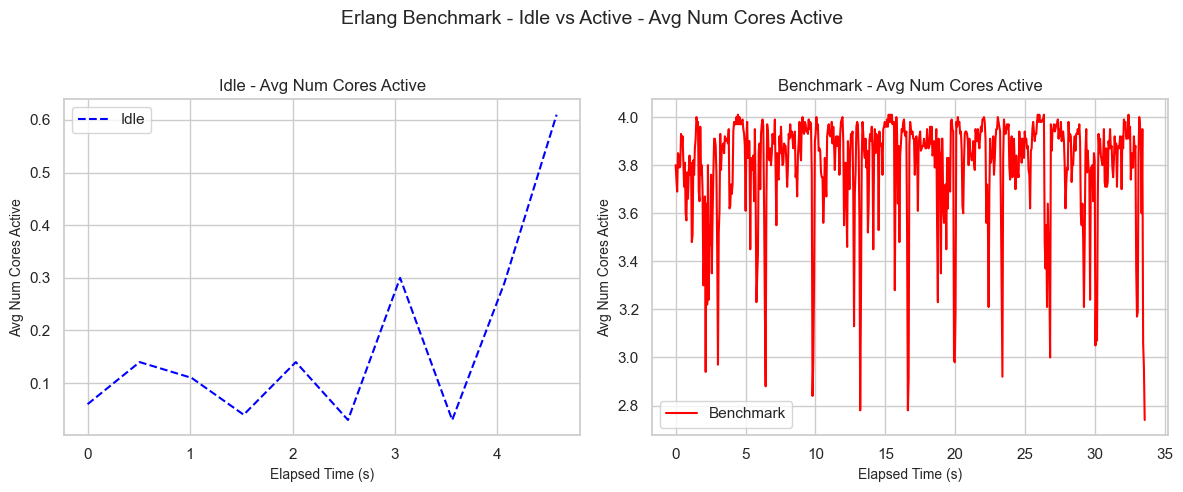

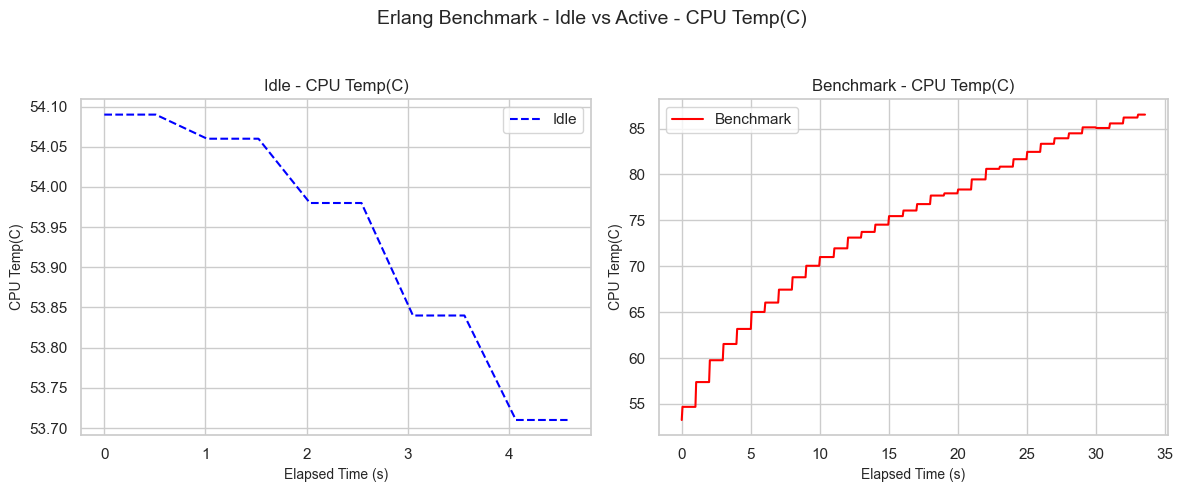

In [35]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [36]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [37]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

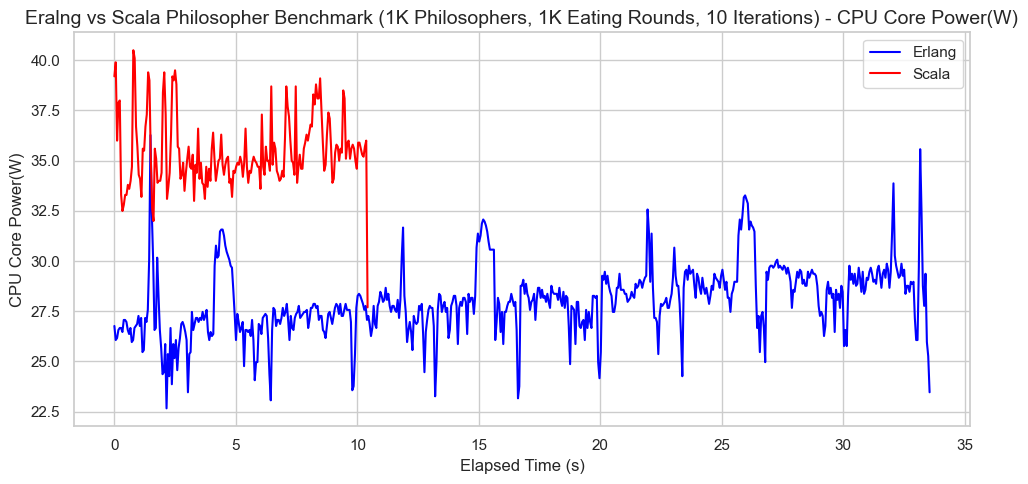

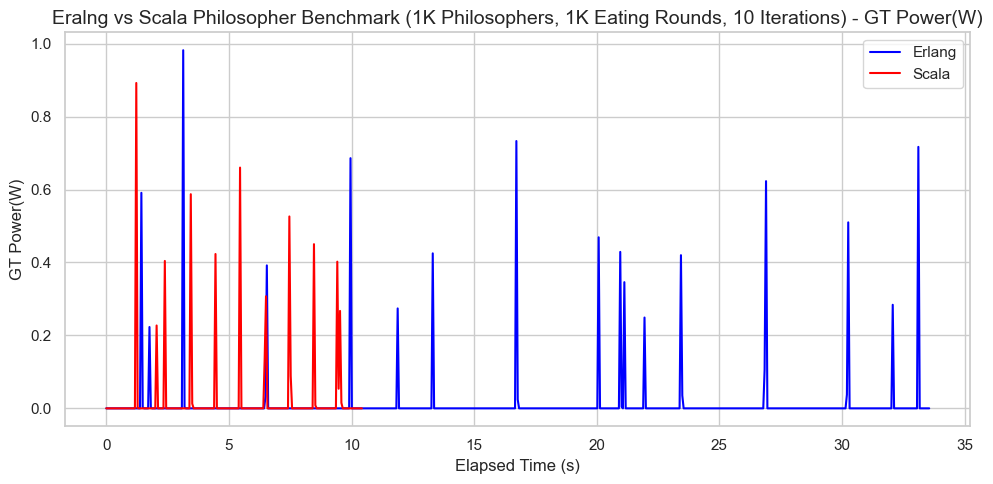

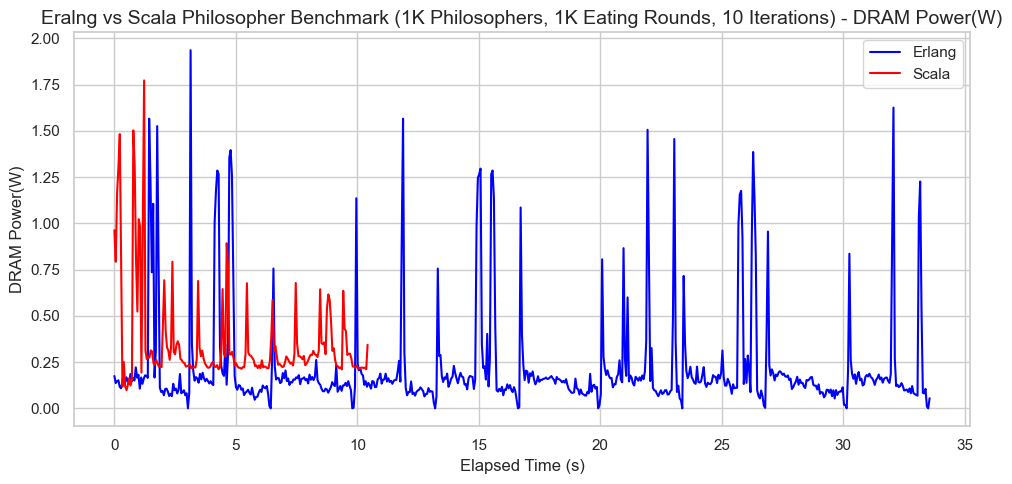

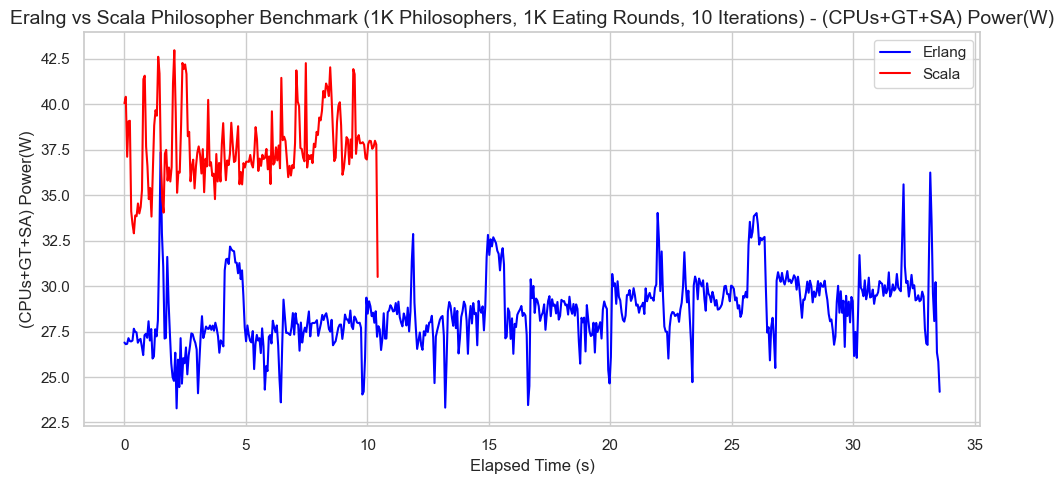

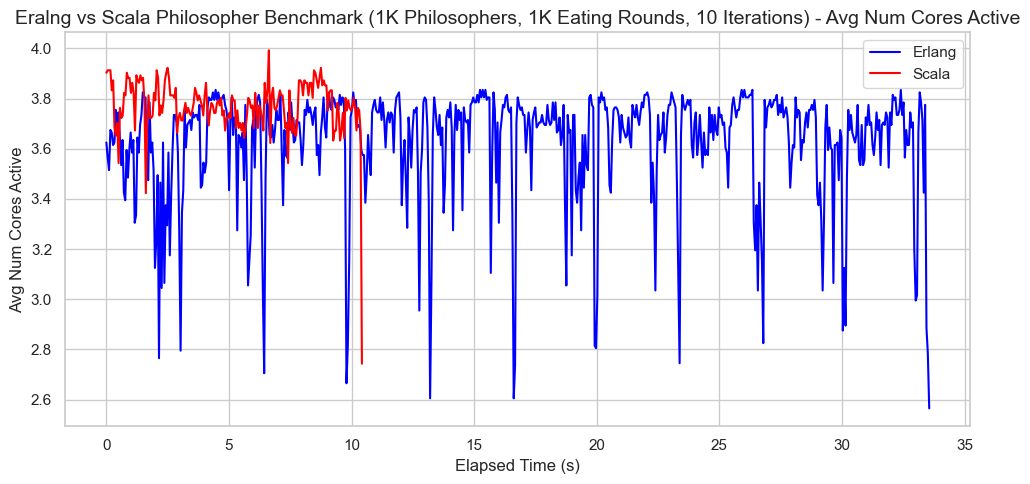

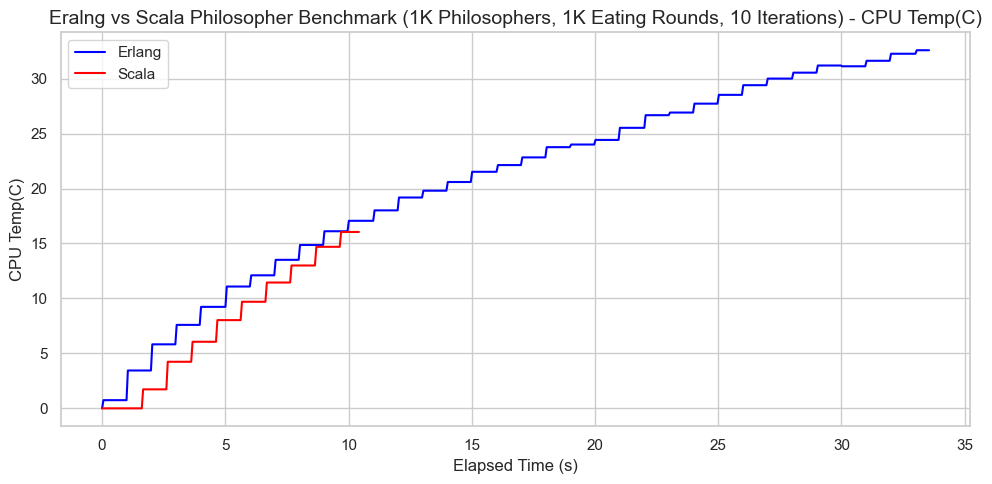

In [38]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [39]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [40]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        35.430844
GT Power(W)               0.023808
DRAM Power(W)             0.354479
(CPUs+GT+SA) Power(W)    37.613330
CPU Temp(C)               7.544915
Avg Num Cores Active      3.772468
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        28.027332
GT Power(W)               0.008335
DRAM Power(W)             0.219515
(CPUs+GT+SA) Power(W)    28.645087
CPU Temp(C)              20.768648
Avg Num Cores Active      3.625720
dtype: float64


Compute Total Energy Consumption

In [41]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


File created and results saved to ../../../data/philosopher/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 375.01157421939564 Joules
Erlang Benchmark: 949.4163454373083 Joules
